In [1]:
import sys
import os

# Obtém o diretório raiz do pacote
root_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Adiciona o diretório raiz ao sys.path
sys.path.append(root_dir)

import lightning.pytorch as pl
from datamodule.chirps_cmip6 import ChirpsDataModule, BlurChirpsDataModule
from model.swin2sr import Swin2SRLight
from model.unet import UnetModule
from model.vgg import VggModule


/home/diler/.cache/pypoetry/virtualenvs/downscaling-hfnw0hYX-py3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# model = Swin2SRLight(upscale=5, img_size=(32, 32), in_chans=1,
#                 window_size=8, img_range=1., depths=[6, 6, 6, 6],
#                 embed_dim=60, num_heads=[6, 6, 6, 6], mlp_ratio=2, upsampler='pixelshuffledirect')
# model_unet = UnetModule()
model = VggModule()
datamodule = BlurChirpsDataModule(data_dir="/home/diler/dev/downscaling/datamodule/dataset/high-low")

In [4]:
# train model
trainer = pl.Trainer(max_epochs=2)
trainer.fit(model=model, datamodule=datamodule)

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/diler/.cache/pypoetry/virtualenvs/downscaling-hfnw0hYX-py3.9/lib/python3.9/site-packages/pytorch_lightning/trainer/setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(

  | Name     | Type              | Params
-----------------------------------------------
0 | model    | VGG               | 134 M 
1 | loss     | BCEWithLogitsLoss | 0     
2 | accuracy | BinaryAccuracy    | 0     
-----------------------------------------------
134 M     Trainable params
0         Non-trainable params
134 M     Total params
537.054   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/home/diler/.cache/pypoetry/virtualenvs/downscaling-hfnw0hYX-py3.9/lib/python3.9/site-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Sanity Checking DataLoader 0:  50%|█████     | 1/2 [00:03<00:03,  3.62s/it]

In [1]:
from datamodule.chirps_cmip6 import Chirps

dataset = Chirps(data_dir="/Users/dilermando/dev/downscaling/datamodule/dataset/high-low", type='train')

# inference model
model.eval()
model.freeze()

output = model(dataset[0][0].unsqueeze(0))


ModuleNotFoundError: No module named 'datamodule'

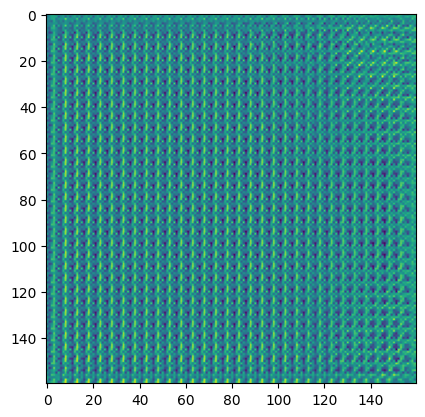

In [54]:
import matplotlib.pyplot as plt

plt.imshow(output.squeeze().detach().numpy())

In [55]:
import torch

preds = torch.argmax(model(torch.randn(2,1,160,160)), dim=1)
preds

tensor([0, 0])

In [56]:
import torchmetrics

acc = torchmetrics.Accuracy(task='binary')
